# Student Stress Analysis

We will be using the "Student Stress Analysis" Kaggle dataset by Warda Bilal to investigate the patterns between different stress factors and student stress levels as well as determine the most contributing factor to stress.

The dataset contains 521 instances with the following 6 features:
- `sleep_quality`: number from 1-5, with 1 being the worst and 5 being the best.

- `headache_freq`: number of headaches suffered per week

- `academic_performance`: number from 1-5, with 1 being the worst and 5 being the best

- `study_load`: number from 1-5, with 1 being the lightest and 5 being the heaviest

- `extracurricular_activity`: number of practices per week

- `stress_level`: target value from 1-5, with 1 being low stress and 5 being high stress

## Data Cleaning / Preprocessing

First, we will begin by loading and inspecting the dataset.
1. Import all libraries needed

2. Load the CSV file

3. See what features are included

4. Simplify feature names

5. Identify missing or duplicated values

6. Split df and view data distribution

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('stressfactors.csv')
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 6 columns):
 #   Column                                                            Non-Null Count  Dtype
---  ------                                                            --------------  -----
 0   Kindly Rate your Sleep Quality 😴                                  520 non-null    int64
 1   How many times a week do you suffer headaches 🤕?                  520 non-null    int64
 2   How would you rate you academic performance 👩‍🎓?                  520 non-null    int64
 3   how would you rate your study load?                               520 non-null    int64
 4   How many times a week you practice extracurricular activities 🎾?  520 non-null    int64
 5   How would you rate your stress levels?                            520 non-null    int64
dtypes: int64(6)
memory usage: 24.5 KB


((520, 6), None)

In [9]:
df.head()
df.describe()

,Kindly Rate your Sleep Quality 😴,How many times a week do you suffer headaches 🤕?,How would you rate you academic performance 👩‍🎓?,how would you rate your study load?,How many times a week you practice extracurricular activities 🎾?,How would you rate your stress levels?
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,3.125000,2.182692,3.326923,2.750000,2.682692,2.875000
std,1.099023,1.247459,1.061158,1.372381,1.470745,1.357825
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
50%,3.000000,2.000000,3.000000,2.500000,3.000000,3.000000
75%,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Since the feature names are very long and unnecessary, we will rename them to be more simple and straightforward.

In [10]:
df.columns = ['sleep_quality', 'headache_freq', 'academic_performance', 'study_load', 'extracurricular_activity', 'stress_level']
df.columns

Index(['sleep_quality', 'headache_freq', 'academic_performance', 'study_load',
       'extracurricular_activity', 'stress_level'],
      dtype='object')

We will now check for any missing values and duplicated data.

In [11]:
display(df.isna().sum())
df.duplicated().sum()

sleep_quality               0
headache_freq               0
academic_performance        0
study_load                  0
extracurricular_activity    0
stress_level                0
dtype: int64

np.int64(416)

Since students can technically have the same answers, and there are no unique features that identify students from each other, we will keep duplicated data. There are also no missing values, so we do not have to drop any rows.

Lastly, we will split up the features and target class and view the data distribution.

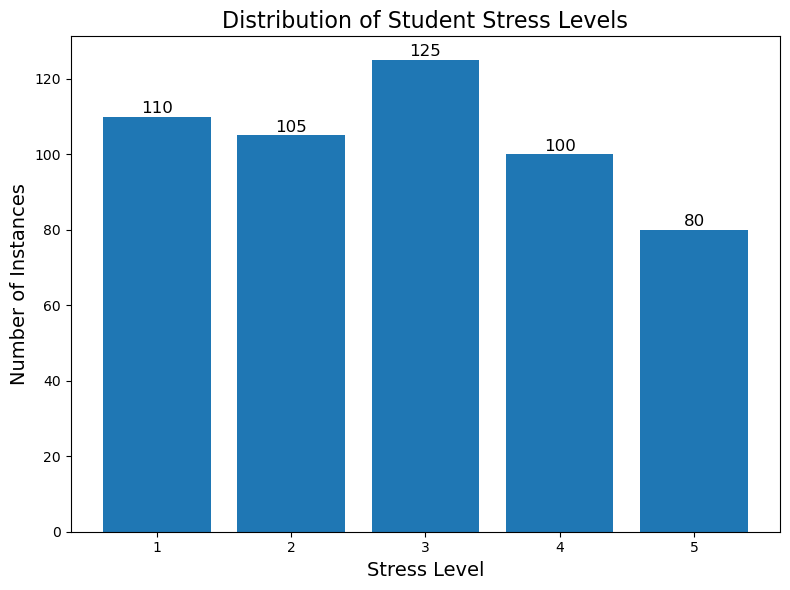

In [25]:
# load the features and target class
X = df.drop(columns=['stress_level'])
y = df['stress_level']

# plot bar graph for stress levels
class_counts = y.value_counts().sort_index()
plt.figure(figsize=(8,6))
bars = plt.bar(class_counts.index, class_counts.values)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,              # position above the bar
        f"{height}",              # text (count)
        ha='center', fontsize=12
    )

plt.title("Distribution of Student Stress Levels", fontsize=16)
plt.xlabel("Stress Level", fontsize=14)
plt.ylabel("Number of Instances", fontsize=14)

plt.tight_layout()
plt.show()

## Logistic Regression Model
Since this data is more categorical with every stress factor being ranked 1-5, we think Logistic Regression is a good baseline model for this data.

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

In [14]:
# scaling data is good for logistic regression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [16]:
# train the model
model = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=2000,
    C=1.0
)
model.fit(X_train, y_train)

/opt/miniconda3/envs/old_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'multinomial'


In [17]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

In [18]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC score:", roc_auc_score(y_test, y_proba, multi_class='ovr', labels=model.classes_))

Accuracy: 0.375
ROC AUC score: 0.6958950861867909


**Results:** As we can see here, the model is very inaccurate. After some more research, we learned that a Random Forest Classifier is better for ordinal data.

## Random Forest Classifier Model
Now let's repeat the steps for training and testing a random forest classifier.

In [19]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    class_weight="balanced"
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_proba = model.predict_proba(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC score:", roc_auc_score(y_test, y_proba, multi_class='ovr', labels=model.classes_))

Accuracy: 0.9423076923076923
ROC AUC score: 0.6732121404287617


/opt/miniconda3/envs/old_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


**Results:** The model improved very significantly!. This choice was a lot better at making predictions of levels of stress with respect to the different factors.